<a href="https://colab.research.google.com/github/kmohan10/Decision_Tree/blob/main/College_Admis_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# College Admission Decision Tree

The objective is to create a Decision Tree to Predict if a student will be Admitted in the college based on their GRE, TOEFL, CGPA, SOP and Research scores.

We will be using the dataset '[Admission_Predict.csv](https://www.kaggle.com/datasets/mohansacharya/graduate-admissions?resource=download)' which is sourced from Kaggle.  Following the citation for the Dataset:

*Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019*

In [1]:
# prompt: load packages to create Decision Tree model

!pip install scikit-learn

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt


In [2]:
# prompt: read Admission_Predict.csv file

import pandas as pd
# Load the dataset
data = pd.read_csv('/content/Admission_Predict.csv', index_col=0)

# Assuming 'Chance of Admit' is the target variable
# You might need to adjust this based on your actual target column
# Display some info
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 1 to 400
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 28.1 KB


In [3]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# prompt: Add a new column 'Admitted'.  If 'Chance of Admit' >= 0.75, assign value 'True' to 'Admitted' else assign value 'False' to 'Admitted'

data['Admitted'] = data['Chance of Admit '] >= 0.75

In [5]:
# prompt: Display top 5 rows

data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admitted
Serial No.,,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92,True
2,324,107,4,4.0,4.5,8.87,1,0.76,True
3,316,104,3,3.0,3.5,8.00,1,0.72,False
4,322,110,3,3.5,2.5,8.67,1,0.80,True
5,314,103,2,2.0,3.0,8.21,0,0.65,False


In [6]:
# prompt: drop the column 'Chance of Admit'

# Drop the 'Chance of Admit ' column
data = data.drop('Chance of Admit ', axis=1)

data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,True
2,324,107,4,4.0,4.5,8.87,1,True
3,316,104,3,3.0,3.5,8.00,1,False
4,322,110,3,3.5,2.5,8.67,1,True
5,314,103,2,2.0,3.0,8.21,0,False


In [7]:
# prompt: Create a dataframe using Pandas containing all columns except 'Admitted'

features = data.drop('Admitted', axis=1)
features.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
1,337,118,4,4.5,4.5,9.65,1
2,324,107,4,4.0,4.5,8.87,1
3,316,104,3,3.0,3.5,8.00,1
4,322,110,3,3.5,2.5,8.67,1
5,314,103,2,2.0,3.0,8.21,0


In [8]:
# prompt: Create a Pandas dataframe 'labels' containing 'Admitted' column only

labels = data[['Admitted']]
labels.head()

,Admitted
Serial No.,
1,True
2,True
3,False
4,True
5,False


Accuracy: 1.0


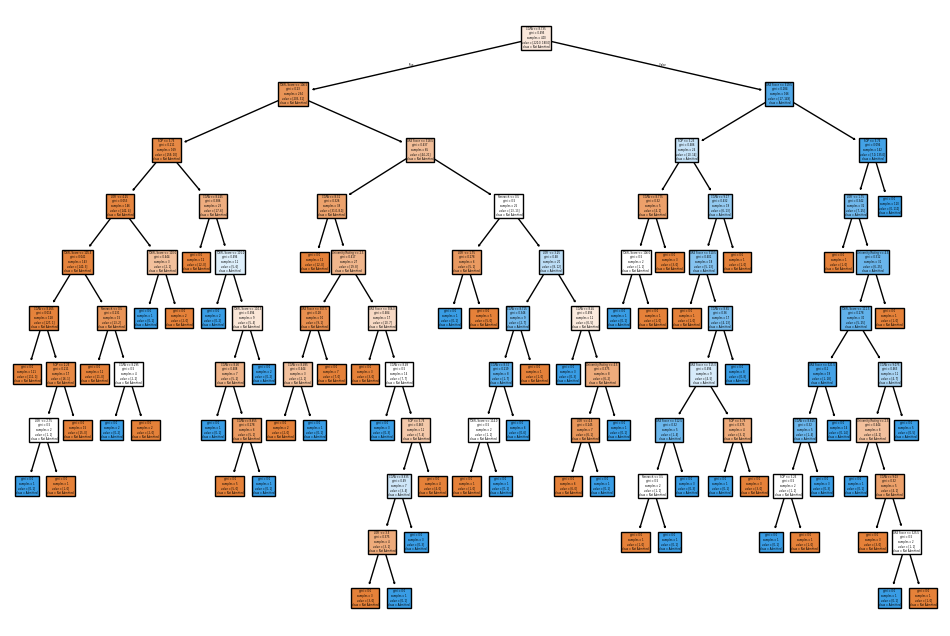

In [11]:
# prompt: Create a Decision Tree model using features and labels for the entire dataset

# Create and train the Decision Tree model
model = DecisionTreeClassifier()
model.fit(features, labels)

# You can now use the trained model to make predictions
# For example, to predict on the training data itself:
predictions = model.predict(features)

# Evaluate the model (optional, but good practice)
accuracy = accuracy_score(labels, predictions)
print(f"Accuracy: {accuracy}")

# Visualize the decision tree (optional)
plt.figure(figsize=(12,8))
tree.plot_tree(model, feature_names=features.columns, class_names=['Not Admitted', 'Admitted'], filled=True)
plt.show()

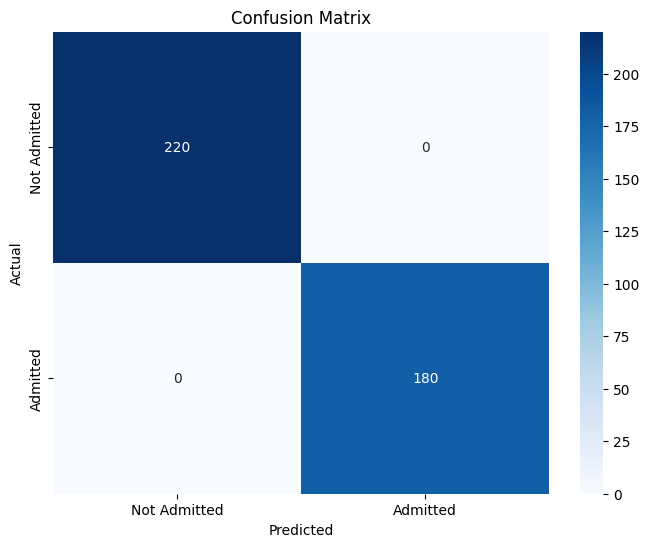

In [12]:
# prompt: Create a confusion matrix for the prediction model above

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create the confusion matrix
cm = confusion_matrix(labels, predictions)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Admitted', 'Admitted'],
            yticklabels=['Not Admitted', 'Admitted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


This Decision Tree has an Accuracy = 1 ... notice that it massively OVERFITS.

Now let us try to achieve more generalization using the Hyperparameters.

In [15]:
# prompt: Determine the optimal values for max_depth, max_leaf_nodes, min_samples_split, and min_samples_leaf using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'max_depth': randint(1, 10),  # Randomly sample max_depth from 1 to 10
    'max_leaf_nodes': randint(2, 20), # Randomly sample max_leaf_nodes from 2 to 20
    'min_samples_split': randint(2, 20), # Randomly sample min_samples_split from 2 to 20
    'min_samples_leaf': randint(1, 10)  # Randomly sample min_samples_leaf from 1 to 10
}


# Create a new DecisionTreeClassifier
tree_model = DecisionTreeClassifier()

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=tree_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings that are sampled.
    cv=5,       # Number of cross-validation folds
    scoring='accuracy',  # Use accuracy as the evaluation metric
    n_jobs=-1     # Use all available processors
)


# Perform the randomized search
random_search.fit(features, labels)


# Print the best hyperparameters and corresponding score
print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

# Get the best model
best_model = random_search.best_estimator_


# Now you can use the best_model to make predictions on new data.
# Example:
# predictions = best_model.predict(new_data)


Best hyperparameters: {'max_depth': 5, 'max_leaf_nodes': 4, 'min_samples_leaf': 9, 'min_samples_split': 7}
Best score: 0.8699999999999999


Accuracy of the model with best hyperparameters: 0.88


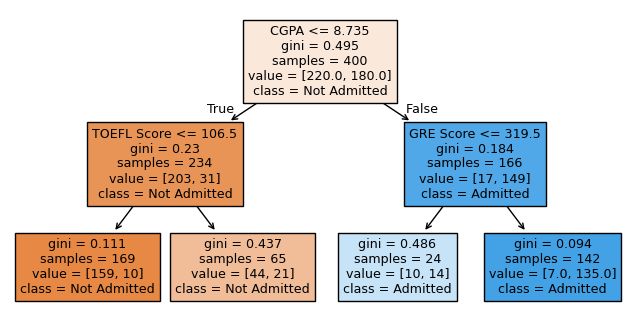

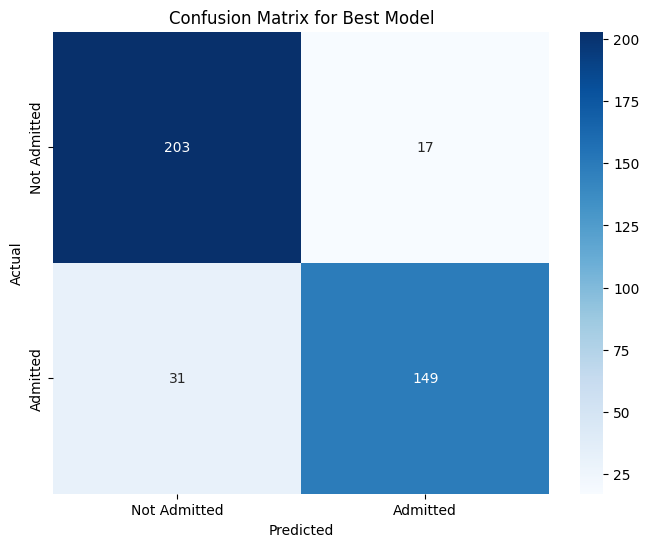

In [20]:
# prompt: Rebuild the Decision Tree using the Best hyperparameters generated above

import matplotlib.pyplot as plt
# Rebuild the Decision Tree using the best hyperparameters

# Access the best hyperparameters from the random_search object
best_hyperparameters = random_search.best_params_

# Create a new DecisionTreeClassifier with the best hyperparameters
best_tree_model = DecisionTreeClassifier(**best_hyperparameters)

# Train the model using the best hyperparameters
best_tree_model.fit(features, labels)

# Make predictions on the training data
best_predictions = best_tree_model.predict(features)

# Evaluate the model with the best hyperparameters
best_accuracy = accuracy_score(labels, best_predictions)
print(f"Accuracy of the model with best hyperparameters: {best_accuracy}")

# Visualize the decision tree with best hyperparameters
plt.figure(figsize=(8, 4))
tree.plot_tree(best_tree_model, feature_names=features.columns, class_names=['Not Admitted', 'Admitted'], filled=True)
plt.show()

# Create the confusion matrix for the best model
cm_best = confusion_matrix(labels, best_predictions)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Admitted', 'Admitted'],
            yticklabels=['Not Admitted', 'Admitted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Best Model')
plt.show()


In [17]:
# prompt: Create the classification report for output above

from sklearn.metrics import classification_report

print(classification_report(labels, best_predictions))


              precision    recall  f1-score   support

       False       0.87      0.92      0.89       220
        True       0.90      0.83      0.86       180

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



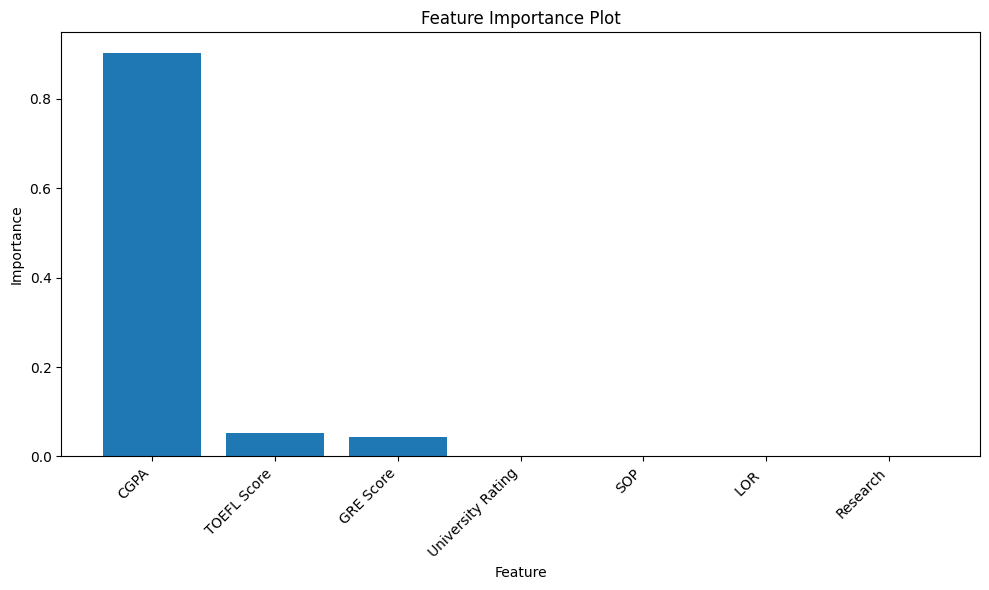

In [18]:
# prompt: Which Features are the most significant?  Represent with a plot

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'best_tree_model' and 'features' are defined from the previous code
feature_importances = best_tree_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Plot')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


Let us try the following hyperparameters to increase the number of leafs

max_depth = 3  
min_samples_leaf = 10  
min_samples_split = 10  

Tuned Accuracy: 0.885


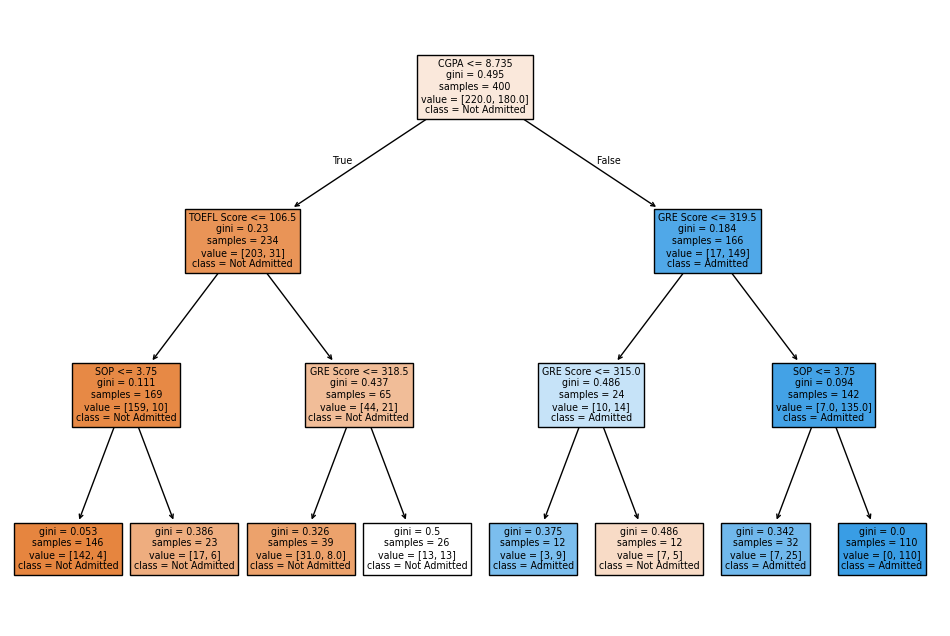

In [13]:
# prompt: Rebuild the Decision Tree with max_depth = 3, min_samples_leaf = 10, min_samples_split = 10

# Rebuild the Decision Tree with specified hyperparameters
model_tuned = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=10)
model_tuned.fit(features, labels)

# Make predictions using the tuned model
predictions_tuned = model_tuned.predict(features)

# Evaluate the tuned model
accuracy_tuned = accuracy_score(labels, predictions_tuned)
print(f"Tuned Accuracy: {accuracy_tuned}")

# Visualize the tuned decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(model_tuned, feature_names=features.columns, class_names=['Not Admitted', 'Admitted'], filled=True)
plt.show()

**OBSERVATIONS:**  



*   Orange Boxes - Not Admitted
*   Blue Boxes - Admitted
*   White Box - Equal number of Admitted and Not Admitted
*   Node with 0 Not Admitted has students who had
    *  CGPA > 8.735
    *  GRE > 319.5
    *  SOP > 3.75
    *  There are 110 such Students
*   CGPA becomes the most important Node since most of the students with CGPA <= 8.735 were Not Admitted
*   GRE and TOEFL scores assume the next level of importance with regard to the student getting Admitted.



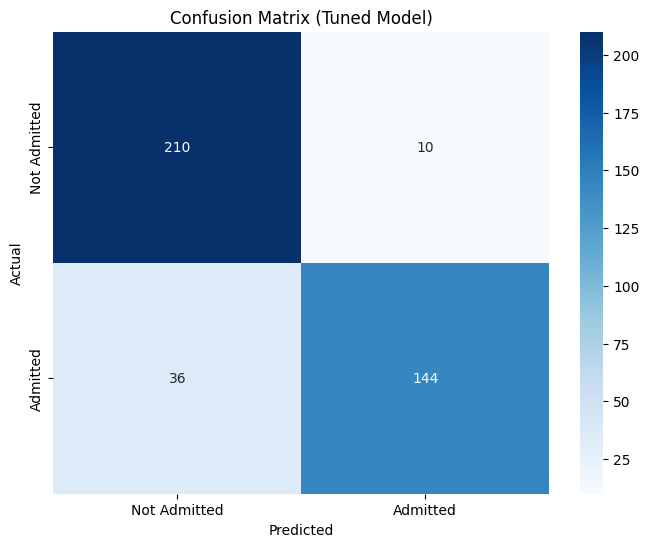

In [21]:
# prompt: Create a confusion matrix for the prediction model above

import matplotlib.pyplot as plt
# Create the confusion matrix for the tuned model
cm_tuned = confusion_matrix(labels, predictions_tuned)

# Plot the confusion matrix for the tuned model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Admitted', 'Admitted'],
            yticklabels=['Not Admitted', 'Admitted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned Model)')
plt.show()


In [22]:
# prompt: Create a classification report

print(classification_report(labels, predictions_tuned))


              precision    recall  f1-score   support

       False       0.85      0.95      0.90       220
        True       0.94      0.80      0.86       180

    accuracy                           0.89       400
   macro avg       0.89      0.88      0.88       400
weighted avg       0.89      0.89      0.88       400

